In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [7]:
df = pd.read_csv('new_model.csv')

In [8]:
df


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1,0.0,1,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,1
1,50,1.020,4,0.0,1,18.0,0.8,137.53,4.63,11.3,6000,4.71,0.0,1
2,80,1.010,2,3.0,1,53.0,1.8,137.53,4.63,9.6,7500,4.71,0.0,1
3,70,1.005,4,NaN,1,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,1
4,80,1.010,2,0.0,1,26.0,1.4,137.53,4.63,11.6,7300,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,0,0.0,1,49.0,0.5,150.00,4.90,15.7,6700,4.90,0.0,0
396,70,1.025,0,0.0,1,31.0,1.2,141.00,3.50,16.5,7800,6.20,0.0,0
397,80,1.020,0,0.0,1,26.0,0.6,137.00,4.40,15.8,6600,5.40,0.0,0
398,60,1.025,0,0.0,1,50.0,1.0,135.00,4.90,14.2,7200,5.90,0.0,0


In [9]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       1
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      1
Class    0
dtype: int64

In [10]:
df_copy = df.copy(deep = True)

In [11]:
df_copy[['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo' , 'Wbcc','Rbcc','Htn','Class']] = df_copy[['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo' , 'Wbcc','Rbcc','Htn','Class']].replace(0,np.NaN)

In [12]:
df_copy

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1.0,NaN,1.0,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,1.0
1,50,1.020,4.0,NaN,1.0,18.0,0.8,137.53,4.63,11.3,6000,4.71,NaN,1.0
2,80,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500,4.71,NaN,1.0
3,70,1.005,4.0,NaN,1.0,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,1.0
4,80,1.010,2.0,NaN,1.0,26.0,1.4,137.53,4.63,11.6,7300,4.60,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,NaN,NaN,1.0,49.0,0.5,150.00,4.90,15.7,6700,4.90,NaN,NaN
396,70,1.025,NaN,NaN,1.0,31.0,1.2,141.00,3.50,16.5,7800,6.20,NaN,NaN
397,80,1.020,NaN,NaN,1.0,26.0,0.6,137.00,4.40,15.8,6600,5.40,NaN,NaN
398,60,1.025,NaN,NaN,1.0,50.0,1.0,135.00,4.90,14.2,7200,5.90,NaN,NaN


In [13]:
print(df_copy.isnull().sum())

Bp         0
Sg         0
Al       199
Su       339
Rbc       47
Bu         0
Sc         0
Sod        0
Pot        0
Hemo       0
Wbcc       0
Rbcc       0
Htn      252
Class    150
dtype: int64


<Axes: ylabel='count'>

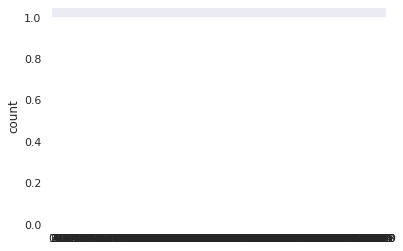

In [14]:
sns.countplot(df['Class'])

In [15]:
print(df.Class.value_counts())

1    250
0    150
Name: Class, dtype: int64


In [16]:
from sklearn.utils import resample


In [19]:
df_maj = df[(df['Class'] == 1)]
df_min = df[(df['Class'] == 0)]


In [20]:
df_maj

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1,0.0,1,36.0,1.2,137.53,4.63,15.40,7800,5.20,1.0,1
1,50,1.020,4,0.0,1,18.0,0.8,137.53,4.63,11.30,6000,4.71,0.0,1
2,80,1.010,2,3.0,1,53.0,1.8,137.53,4.63,9.60,7500,4.71,0.0,1
3,70,1.005,4,NaN,1,56.0,3.8,111.00,2.50,11.20,6700,3.90,1.0,1
4,80,1.010,2,0.0,1,26.0,1.4,137.53,4.63,11.60,7300,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100,1.020,1,0.0,1,79.0,5.3,135.00,6.30,6.30,7200,2.60,1.0,1
246,110,1.015,3,0.0,0,215.0,15.2,120.00,5.70,8.60,5000,2.50,1.0,1
247,90,1.025,1,0.0,1,18.0,1.2,140.00,4.20,12.53,8406,4.71,0.0,1
248,70,1.010,1,3.0,0,55.0,1.7,138.00,4.50,12.60,10200,4.10,1.0,1


In [22]:
df_minority_upscale = resample(df_min, n_samples=250, random_state = 0)

In [23]:
df2 = pd.concat([df_minority_upscale, df_maj])

In [24]:
df2

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
297,60,1.025,0,0.0,1,26.0,1.0,146.0,4.9,15.80,7700,5.20,0.37,0
367,60,1.025,0,0.0,1,41.0,1.1,139.0,3.8,17.40,6700,6.10,0.00,0
317,70,1.020,0,0.0,1,48.0,1.2,139.0,4.3,15.00,8100,4.90,0.00,0
353,60,1.020,0,0.0,1,37.0,0.6,150.0,5.0,13.60,5800,4.50,0.00,0
259,80,1.020,0,0.0,1,31.0,1.2,135.0,5.0,16.10,4300,5.20,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100,1.020,1,0.0,1,79.0,5.3,135.0,6.3,6.30,7200,2.60,1.00,1
246,110,1.015,3,0.0,0,215.0,15.2,120.0,5.7,8.60,5000,2.50,1.00,1
247,90,1.025,1,0.0,1,18.0,1.2,140.0,4.2,12.53,8406,4.71,0.00,1
248,70,1.010,1,3.0,0,55.0,1.7,138.0,4.5,12.60,10200,4.10,1.00,1


In [26]:
print(df2.Class.value_counts())

0    250
1    250
Name: Class, dtype: int64


<Axes: ylabel='count'>

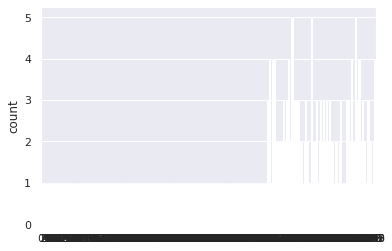

In [27]:
sns.countplot(df2['Class'])

<Axes: ylabel='count'>

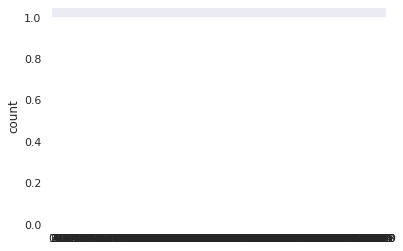

In [42]:
sns.countplot(df['Bp'])

In [30]:
from seaborn import countplot

<Axes: xlabel='Class', ylabel='count'>

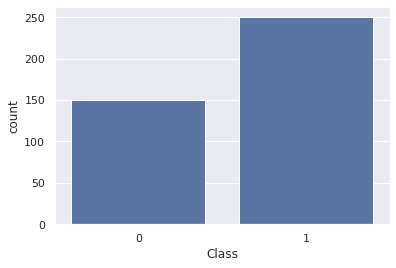

In [47]:
sns.countplot(x=df['Class'])

<Axes: ylabel='count'>

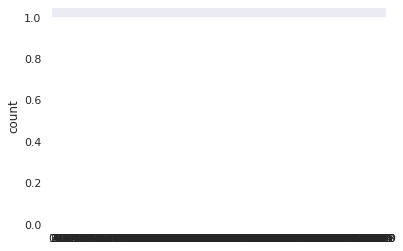

In [38]:
countplot(df['Class'])

<Axes: xlabel='Bp'>

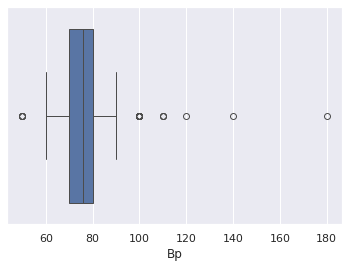

In [33]:
sns.boxplot(x=df2["Bp"])

In [34]:
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1,0.0,1,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,1
1,50,1.020,4,0.0,1,18.0,0.8,137.53,4.63,11.3,6000,4.71,0.0,1
2,80,1.010,2,3.0,1,53.0,1.8,137.53,4.63,9.6,7500,4.71,0.0,1
3,70,1.005,4,NaN,1,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,1
4,80,1.010,2,0.0,1,26.0,1.4,137.53,4.63,11.6,7300,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,0,0.0,1,49.0,0.5,150.00,4.90,15.7,6700,4.90,0.0,0
396,70,1.025,0,0.0,1,31.0,1.2,141.00,3.50,16.5,7800,6.20,0.0,0
397,80,1.020,0,0.0,1,26.0,0.6,137.00,4.40,15.8,6600,5.40,0.0,0
398,60,1.025,0,0.0,1,50.0,1.0,135.00,4.90,14.2,7200,5.90,0.0,0


In [37]:
print(df['Class'].unique())

[1 0]


<Axes: xlabel='Htn', ylabel='count'>

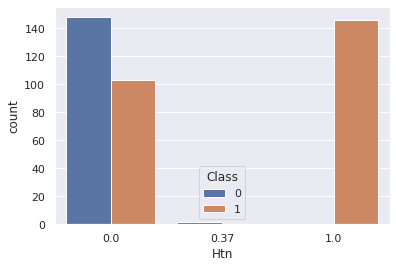

In [43]:
sns.countplot(data=df, x="Htn", hue="Class")

<Axes: xlabel='Class', ylabel='count'>

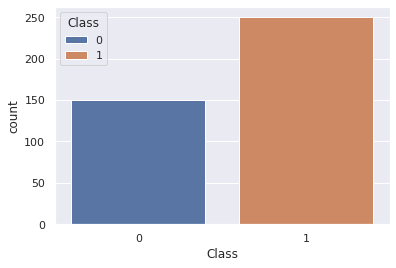

In [45]:
sns.countplot(data=df, x='Class', hue="Class")

<Axes: xlabel='Class', ylabel='count'>

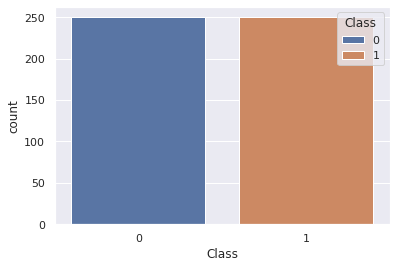

In [46]:
sns.countplot(data=df2, x='Class', hue="Class")